In [1]:
import causallearn
import numpy as np

# JM simulated data

In [2]:
# Get Data
import numpy as np

# Define the correlation matrix
correlation_matrix = np.array([[1.0, 0.8, 0.5, 0.3, -0.2],
                              [0.8, 1.0, 0.7, 0.2, -0.4],
                              [0.5, 0.7, 1.0, 0.4, -0.1],
                              [0.3, 0.2, 0.4, 1.0, -0.3],
                              [-0.2, -0.4, -0.1, -0.3, 1.0]])

# Generate the correlated random variables
data = np.random.multivariate_normal(mean=[0, 0, 0, 0, 0], cov=correlation_matrix, size=1000)

In [3]:
import numpy as np

def generate_gaussian_variables(num_samples = 10000):
    
    # Define influence relationships
    influences = {
        1: [],
        2: [1],
        3: [2],
        4: [3],
        5: [4],
        6: [1, 4, 5],
        7: [1, 2, 6]
    }
    n = len(influences)
    # Initialize variables
    variables = np.zeros((num_samples, n))

    # Generate variables
    for i in range(1, n+1):
        influence_weight = 0
        for j in influences[i]:
            influence_weight += variables[:,j-1]
        variables[:,i-1] = np.random.normal(size = num_samples) + influence_weight
    return variables

# Test the program
data = generate_gaussian_variables()
print("Generated variables:", data)
print(data.shape)


Generated variables: [[-0.33928912 -1.00657457  0.96376887 ...  0.72283463  1.9384672
  -0.74594933]
 [-0.62149919  0.01991723 -0.79009172 ... -2.82624377 -5.62047023
  -7.91986503]
 [ 0.85130094  0.96535657  0.40843645 ...  1.51911602  2.22898818
   2.70171388]
 ...
 [ 0.107919    0.80514345 -1.15998197 ...  0.02401411 -0.2034732
   0.78654352]
 [ 0.62171059  0.85925801  0.97281238 ... -0.16029736  1.98063323
   2.72240903]
 [ 0.53813154  2.71120145  3.65254513 ...  4.8341796   7.28587376
  11.61362253]]
(10000, 7)


c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Depth=3, working on node 6: 100%|██████████| 7/7 [00:00<00:00, 699.98it/s] 


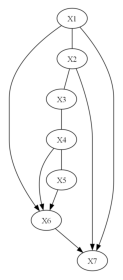

In [4]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.PCUtils import BackgroundKnowledge
from causallearn.graph.Node import Node
import pydot

import networkx as nx

# default parameters
#edge (1,6) is required
bk = None
# bk = BackgroundKnowledge()
# bk.add_forbidden_by_node()
cg = pc(data, backgground_knowledge = bk)

# # or customized parameters
# cg = pc(data, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

# # visualization using networkx
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

In [5]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
X = data
Record = ges(X)

# or customized parameters
# Record = ges(X, score_func, maxP, parameters)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io



[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  0  0 -1  0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 -1]
 [ 0  0  0  0  0 -1  0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0 -1  1  0 -1]
 [ 0  0  0  0  0 -1  0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  1  0  0 -1  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0 -1 -1  0 -1]
 [ 0  0  0  0  0 -1  0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [ 0  0  0 -1  0  0  0]
 [ 0  0 -1  0  0 -1  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0 -1 -1  0 -1]
 [ 0  1  0  0  0 -1  0]]
[[ 0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0 -1]
 [ 0  0  0 -1  0  0  0]
 [ 0  0 -1  0  0 -1  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0 -1 -1  0 -1]
 [ 1 -1  0 

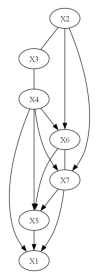

In [6]:
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

# On Niki's simulated data

In [7]:
def sample(n: int, alpha: float) -> np.ndarray:
    """Return n samples as a (n, 5) dimensional array."""
    np.random.seed(0)

    N1 = np.random.randn(n)
    N2 = np.random.randn(n)
    N3 = np.random.randn(n)
    N4 = np.random.randn(n)
    N5 = np.random.randn(n)
    N6 = np.random.randn(n)
    N7 = np.random.randn(n)
    N8 = np.random.randn(n)
    N9 = np.random.randn(n)
    X1 = N1
    X3 = 2 * X1 + N3
    X4= -X3 + N4
    X5 = alpha * X3 + N5
    X2 = -2 * X1 + 3 * X4 + 5 * X5 + N2
    X6 = 0.4*X4 + 0.6*X2 + N6
    X7 = 0.3*X2 + 0.5*X3 + N7
    return np.array((X1, X2, X3, X4, X5,X6,X7)).T
def sample_int(n: int) -> np.ndarray:
    """Return n samples under intervention X5=1."""
    np.random.seed(0)
    N1 = np.random.randn(n)
    N2 = np.random.randn(n)
    N3 = np.random.randn(n)
    N4 = np.random.randn(n)
    N5 = np.random.randn(n)
    X1 = N1
    X3 = 2 * X1 + N3
    X4 = -X3 + N4
    X5 = np.ones_like(X1)
    X2 = -2 * X1 + 3 * X4 + 5 * X5 + N2
    return np.array((X1, X2, X3, X4, X5)).T

In [8]:
data = sample(10000, alpha = 0.5)

Depth=3, working on node 6: 100%|██████████| 7/7 [00:00<00:00, 368.66it/s] 


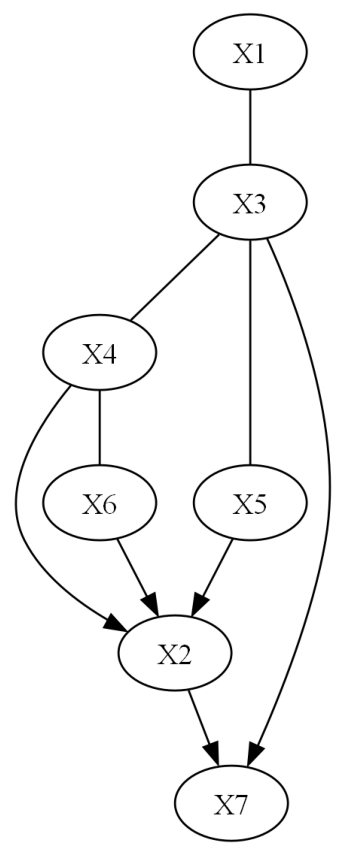

In [9]:
# default parameters
bk = None
cg = pc(data, backgground_knowledge = bk)

# # or customized parameters
# cg = pc(data, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
# pyd.write_png('simple_test.png')

# # visualization using networkx
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

In [10]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
X = data
Record = ges(X)

# or customized parameters
# Record = ges(X, score_func, maxP, parameters)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [ 1  0  0 -1  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [-1  0  0 -1 -1  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0 -1  0  0 -1  0]
 [-1  1  0 -1  1  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0  1  0  0  0  0]
 [ 0  0 -1  0  0 -1 -1]
 [-1  1  0 -1  1  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  1  0 

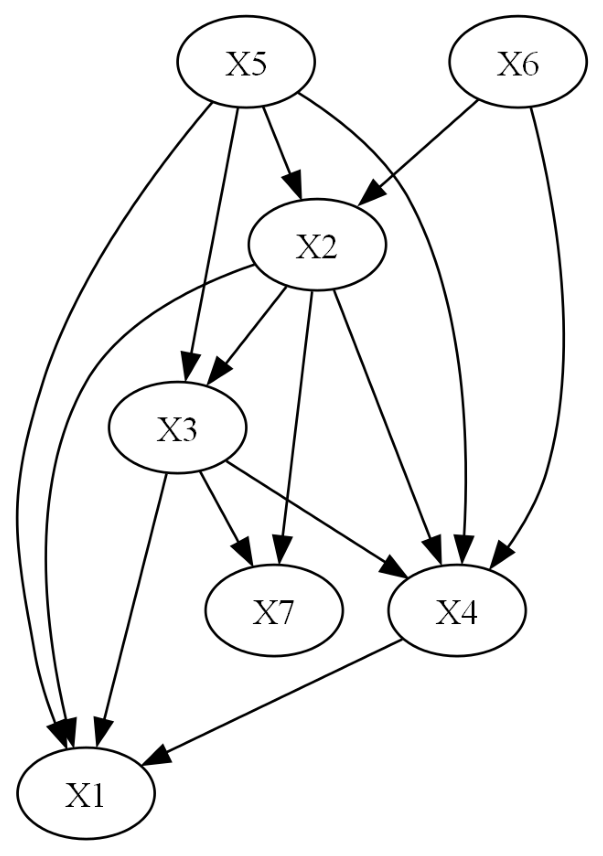

In [11]:
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')